<a href="https://colab.research.google.com/github/SuminBae97/PytorchStudy/blob/main/simplefeedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mxnet

In [ ]:
pip install --upgrade mxnet~=1.7 gluonts

In [ ]:
# pip install d2l
# pip install -U d2l
# pip install -U matplotlib

In [ ]:
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json

Datasets

In [ ]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


<h1>Data Loading</h1>

In [ ]:
dataset_recipes.keys()

odict_keys(['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5'])

<h1>Using m4_daily data</h1>

In [200]:
#dataset = get_dataset("hospital",regenerate=True)
dataset = get_dataset("m4_hourly",regenerate=True)

saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/train/data.json
saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/test/data.json


<h1>주기: 일자 인 데이터셋</h1>

In [201]:
dataset

TrainDatasets(metadata=MetaData(freq='H', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat_0', cardinality='414')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=48), train=<gluonts.dataset.common.FileDataset object at 0x7fde2ea63150>, test=<gluonts.dataset.common.FileDataset object at 0x7fde2e9e13d0>)

In [202]:
dataset.train,dataset.test

(<gluonts.dataset.common.FileDataset at 0x7fde2ea63150>,
 <gluonts.dataset.common.FileDataset at 0x7fde2e9e13d0>)

<h1>train data, test_data 확인</h1>
- 각 4227개의 time series 데이터 존재

- 각 time series는 1750/1/1~ 1752/10/2(1006일) 까지 daily frequency 기반 데이터

<h1>task: 1750/1/1 ~ 1752/10/02 의 time series 데이터로 1750/10/3 ~ 1750/10/16 의 날짜의 데이터를 예측 </h1>

In [203]:
train_data = list(dataset.train)
test_data = list(dataset.test)
len(train_data), len(test_data)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq


(414, 414)

In [204]:
to_pandas(train_data[0])

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


1750-01-01 00:00:00    605.0
1750-01-01 01:00:00    586.0
1750-01-01 02:00:00    586.0
1750-01-01 03:00:00    559.0
1750-01-01 04:00:00    511.0
                       ...  
1750-01-29 23:00:00    790.0
1750-01-30 00:00:00    784.0
1750-01-30 01:00:00    752.0
1750-01-30 02:00:00    739.0
1750-01-30 03:00:00    684.0
Freq: H, Length: 700, dtype: float32

In [205]:
to_pandas(test_data[0])

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


1750-01-01 00:00:00    605.0
1750-01-01 01:00:00    586.0
1750-01-01 02:00:00    586.0
1750-01-01 03:00:00    559.0
1750-01-01 04:00:00    511.0
                       ...  
1750-01-31 23:00:00    785.0
1750-02-01 00:00:00    756.0
1750-02-01 01:00:00    719.0
1750-02-01 02:00:00    703.0
1750-02-01 03:00:00    659.0
Freq: H, Length: 748, dtype: float32

In [207]:
to_pandas(train_data[0])

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


1750-01-01 00:00:00    605.0
1750-01-01 01:00:00    586.0
1750-01-01 02:00:00    586.0
1750-01-01 03:00:00    559.0
1750-01-01 04:00:00    511.0
                       ...  
1750-01-29 23:00:00    790.0
1750-01-30 00:00:00    784.0
1750-01-30 01:00:00    752.0
1750-01-30 02:00:00    739.0
1750-01-30 03:00:00    684.0
Freq: H, Length: 700, dtype: float32

In [217]:
len(to_pandas(train_data[0]))

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


700

<h1>train data 데이터 시각화</h1>

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is d

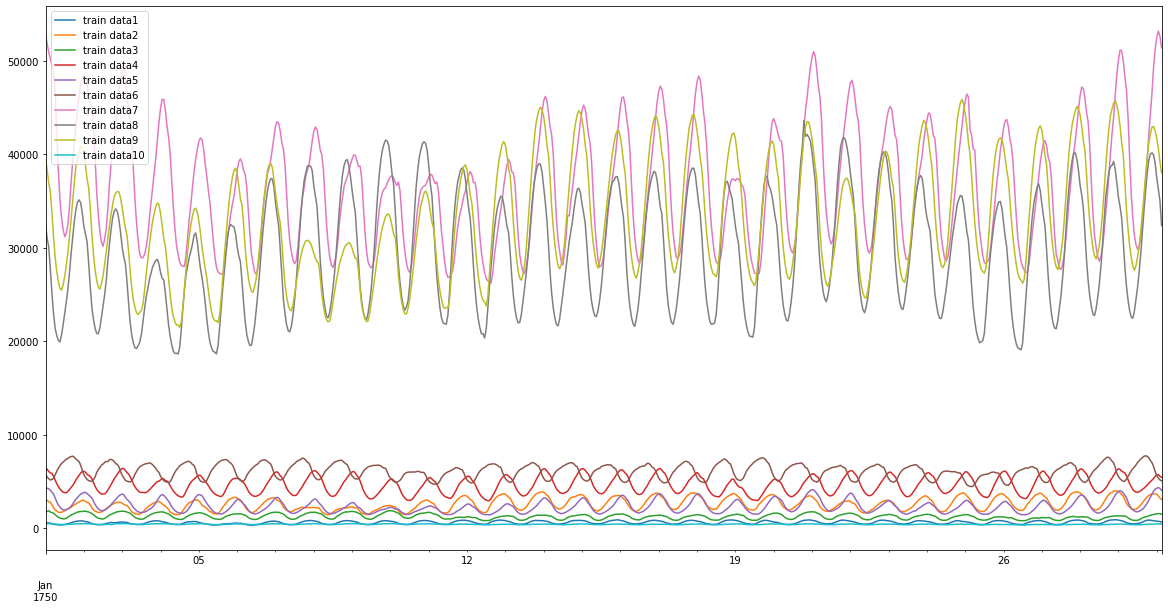

In [208]:
top_ten_train = train_data[:10]

for i in range(len(top_ten_train)):
    #utils 이용해서 Series제작
    train = to_pandas(top_ten_train[i])
    train.plot(figsize=(20,10),label= f"train data{i+1}")
    plt.legend()

<h1>Modeling SimpleFeedForward</h1>

In [209]:
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx import Trainer

mlp_estimator = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[256,128,64],
    prediction_length=dataset.metadata.prediction_length,
    context_length=100,
    freq=dataset.metadata.freq,
    trainer=Trainer(
        ctx="cpu",
        epochs=30,
        learning_rate=1e-3,
        num_batches_per_epoch=100
    )
)


mlp_predictor = mlp_estimator.train(dataset.train)


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
100%|██████████| 100/100 [00:02<00:00, 48.38it/s, epoch=30/30, avg_epoch_loss=4.28]


In [210]:
from gluonts.evaluation import make_evaluation_predictions

mlp_forecast,mlp_ts = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=mlp_predictor,
    num_samples = 100
    #각 train data마다 몇개의 예측값을 봅을건지
)
mlp_forecast = list(mlp_forecast)
mlp_ts = list(mlp_ts)


/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)


<h1>총 4227개의 timeseries, 각 timeseires 별로 100개를 예측</h1>

In [211]:
len(mlp_forecast),mlp_forecast[0].samples.shape

(414, (100, 48))

<h1></h1>

<h1>1번째 time series 예측</h1>

In [212]:
mlp_forecast[0].samples

array([[515.2567 , 577.97864, 535.16943, ..., 889.40576, 753.1986 ,
        669.2358 ],
       [599.9767 , 602.1717 , 482.21362, ..., 779.9689 , 795.0442 ,
        626.2429 ],
       [630.4988 , 639.22577, 529.89056, ..., 788.9179 , 677.54083,
        704.5956 ],
       ...,
       [625.2562 , 598.046  , 574.3942 , ..., 794.0571 , 710.61053,
        706.18335],
       [573.31415, 572.8442 , 541.4958 , ..., 891.49133, 717.7848 ,
        631.8057 ],
       [682.5807 , 519.8756 , 523.3774 , ..., 727.4519 , 759.071  ,
        774.534  ]], dtype=float32)

In [213]:
print(mlp_forecast[0].num_samples)
print(mlp_forecast[0].samples.shape)
print(mlp_forecast[0].start_date)
print(mlp_forecast[0].freq)


100
(100, 48)
1750-01-30 04:00:00
H


<h1>첫번째 timeseries 100개 예측값 평균</h1>

In [214]:
mlp_forecast[0].mean

array([608.2827 , 584.3764 , 557.40045, 521.61957, 500.25497, 487.73547,
       488.05548, 499.91965, 500.79465, 551.12146, 604.6886 , 652.3632 ,
       706.9813 , 757.473  , 792.7605 , 803.1023 , 830.5264 , 834.25476,
       829.1796 , 806.8811 , 775.0176 , 743.51227, 721.71045, 643.61755,
       622.6726 , 590.341  , 568.956  , 535.2522 , 516.3709 , 489.8686 ,
       509.33496, 506.00882, 519.60864, 573.2182 , 618.38245, 667.9164 ,
       710.7225 , 755.8283 , 793.3193 , 816.049  , 830.2216 , 833.6863 ,
       824.0371 , 813.3871 , 770.5412 , 754.79224, 748.8829 , 688.0143 ],
      dtype=float32)

In [223]:
mlp_forecast[0].quantile(0.5)

array([607.60236, 585.60004, 558.10767, 530.68536, 500.55725, 487.18747,
       493.51636, 496.40903, 507.1534 , 548.2073 , 598.3961 , 659.9172 ,
       706.80835, 759.70996, 793.3884 , 806.9297 , 825.6492 , 831.59344,
       830.02625, 797.6647 , 776.4485 , 741.2241 , 723.73193, 651.15216,
       623.61383, 592.9923 , 574.1905 , 533.7291 , 509.80533, 496.54147,
       505.74066, 499.4721 , 514.3948 , 573.0173 , 617.07306, 667.0329 ,
       716.5908 , 757.6824 , 791.5374 , 815.0025 , 833.1586 , 845.56573,
       832.82916, 818.1782 , 777.6254 , 757.29504, 737.7512 , 687.9839 ],
      dtype=float32)

In [218]:
mlp_ts[0][len(to_pandas(train_data[0])):].values.reshape(-1)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


array([619., 565., 532., 495., 481., 467., 473., 488., 501., 534., 576.,
       639., 712., 772., 830., 880., 893., 896., 891., 854., 803., 769.,
       751., 701., 635., 572., 532., 493., 477., 468., 464., 477., 492.,
       519., 568., 624., 696., 761., 812., 836., 838., 829., 807., 785.,
       756., 719., 703., 659.], dtype=float32)

In [283]:
def plot_compare(testIndex):
    plt.figure(figsize=(20,8))
    plt.plot(mlp_ts[testIndex][len(to_pandas(train_data[testIndex])):].values.reshape(-1),label='y')
    plt.plot(mlp_forecast[testIndex].mean,label='forecast mean')
    plt.plot(mlp_forecast[testIndex].quantile(0.5),label='qunatile 0.5')
    plt.plot(mlp_forecast[testIndex].quantile(0.9),label='qunatile 0.5')
    plt.legend()

def plot_prob_forecasts(ts_entry, forecast_entry,i):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    ts_entry[i][-plot_length:].plot(ax=ax)
    #ts_entry[i].plot(ax=ax)  # plot the time series
    forecast_entry[i].plot(prediction_intervals=prediction_intervals, color='y')
    #plt.axvline(train_data[i]['target'].shape[0], color='r')
    plt.grid(which="both")
    
    plt.legend(legend, loc="upper left")
    plt.show()

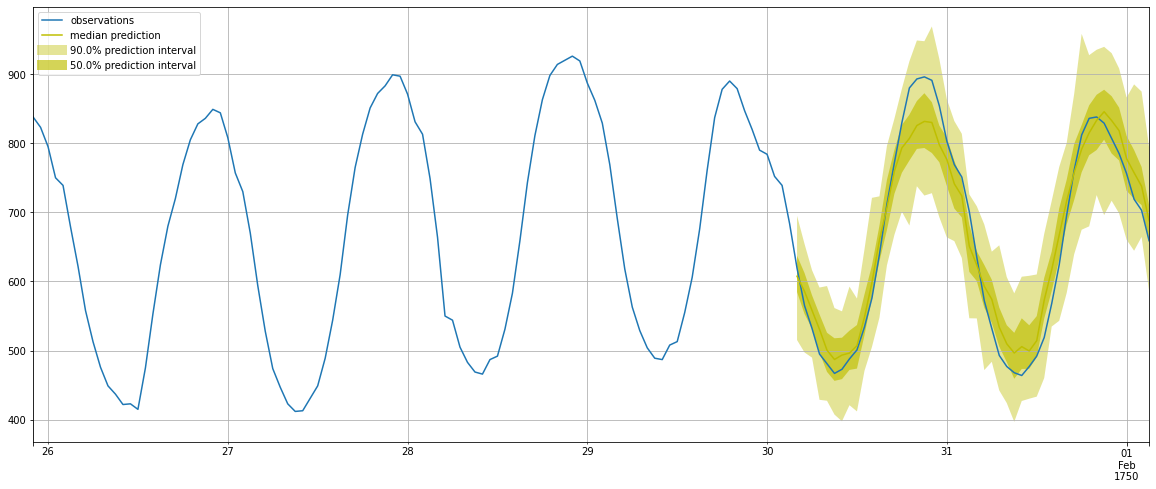

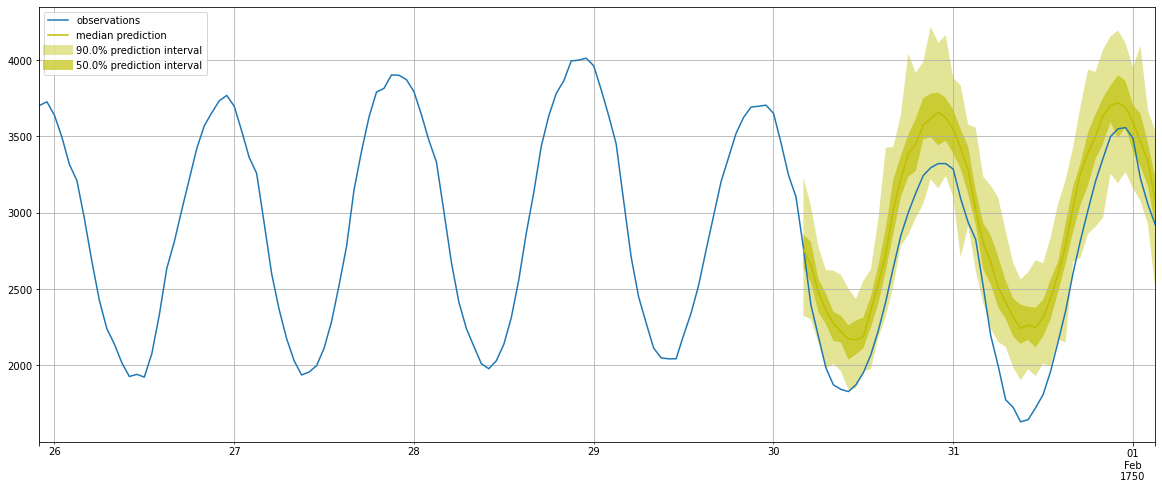

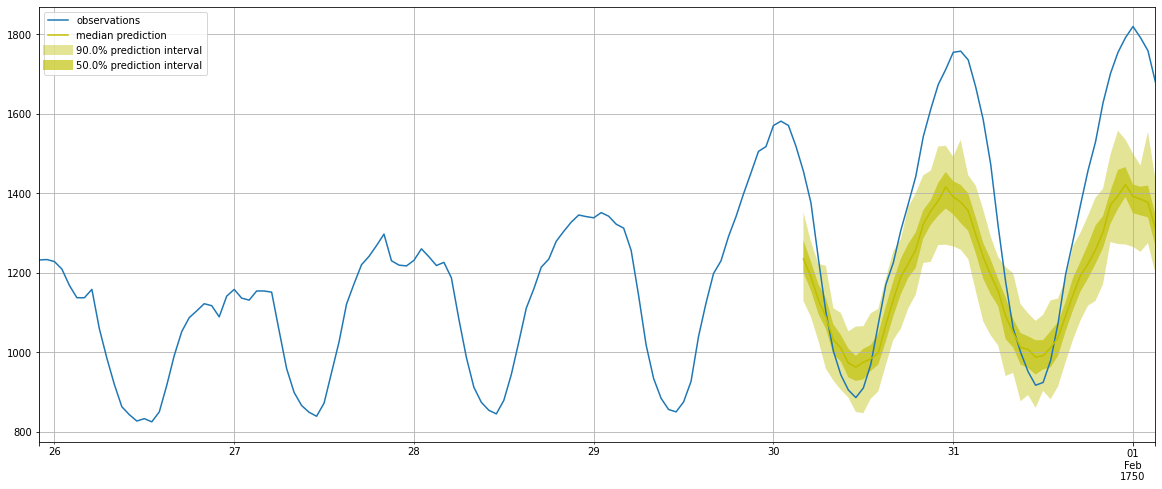

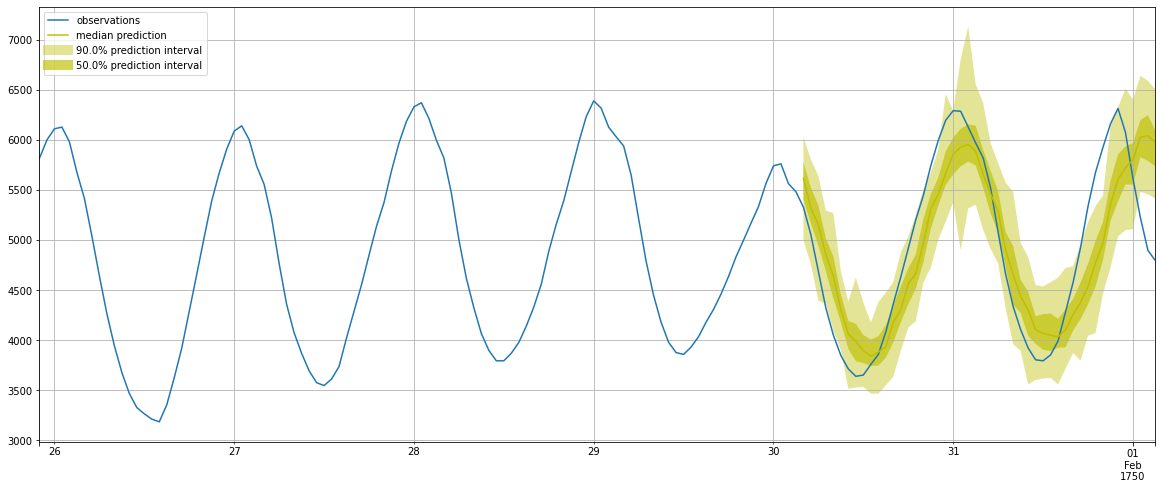

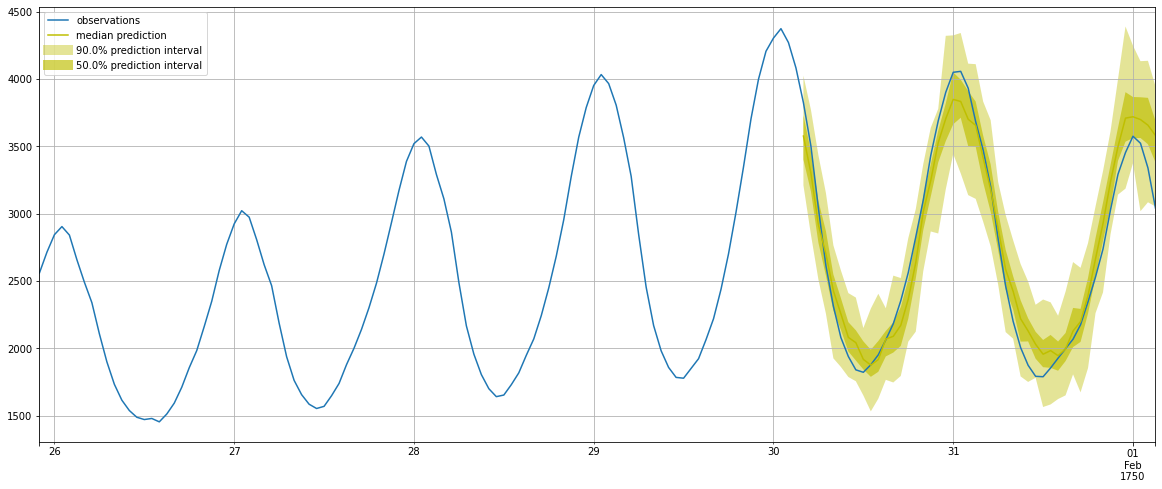

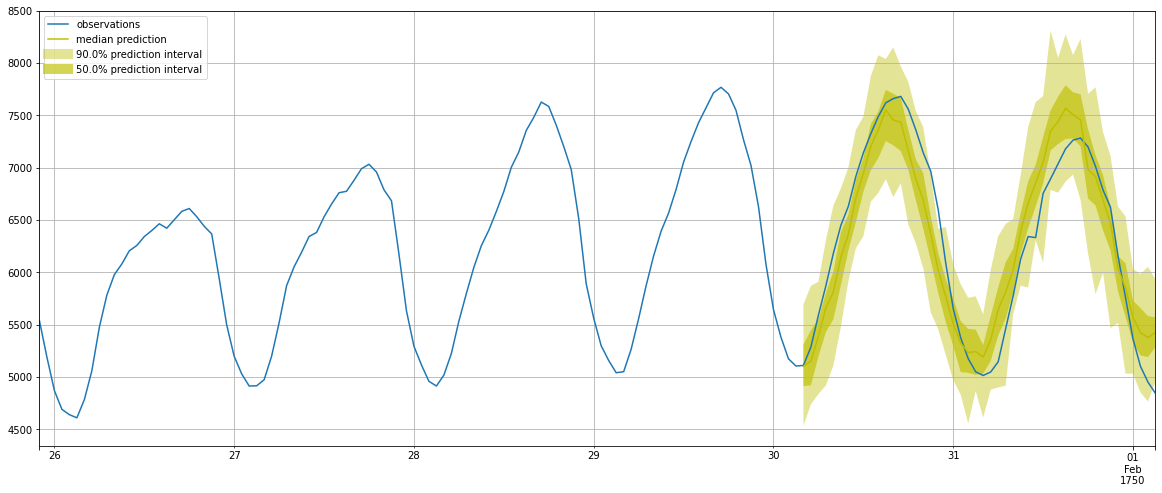

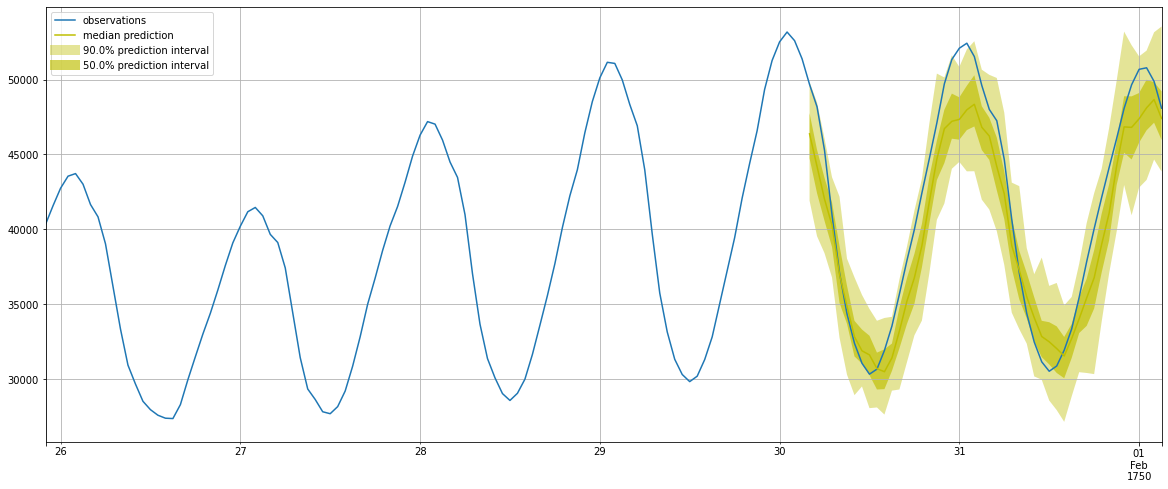

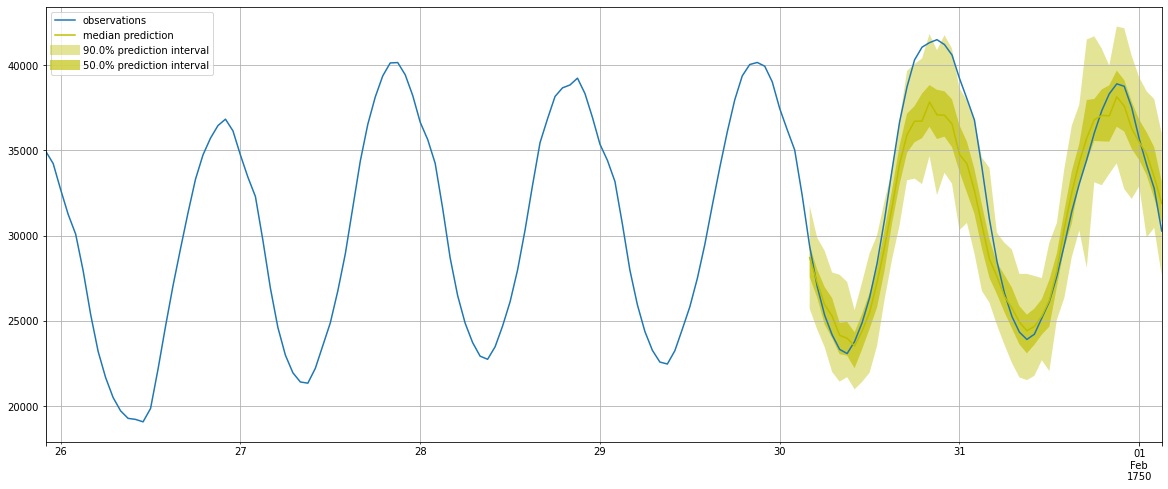

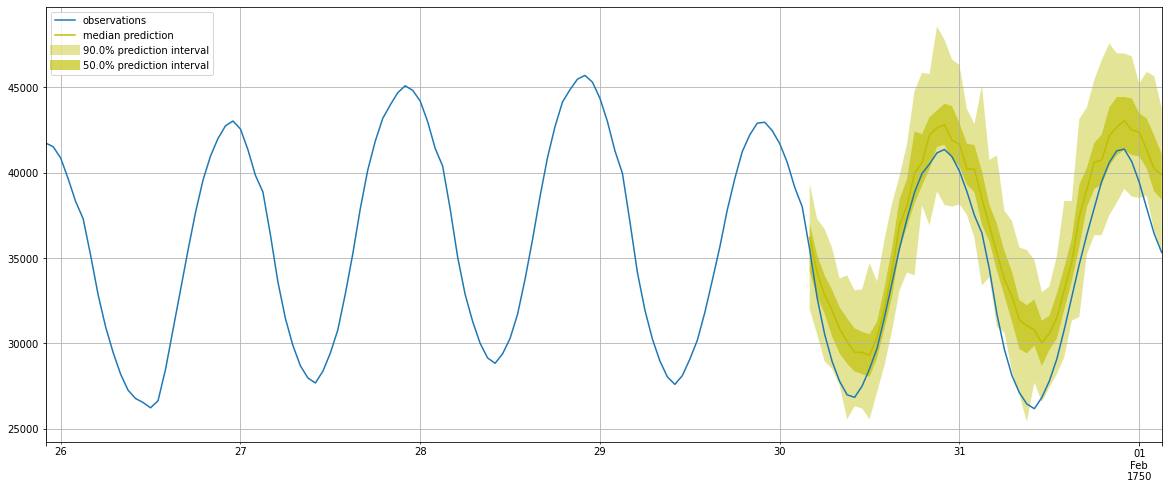

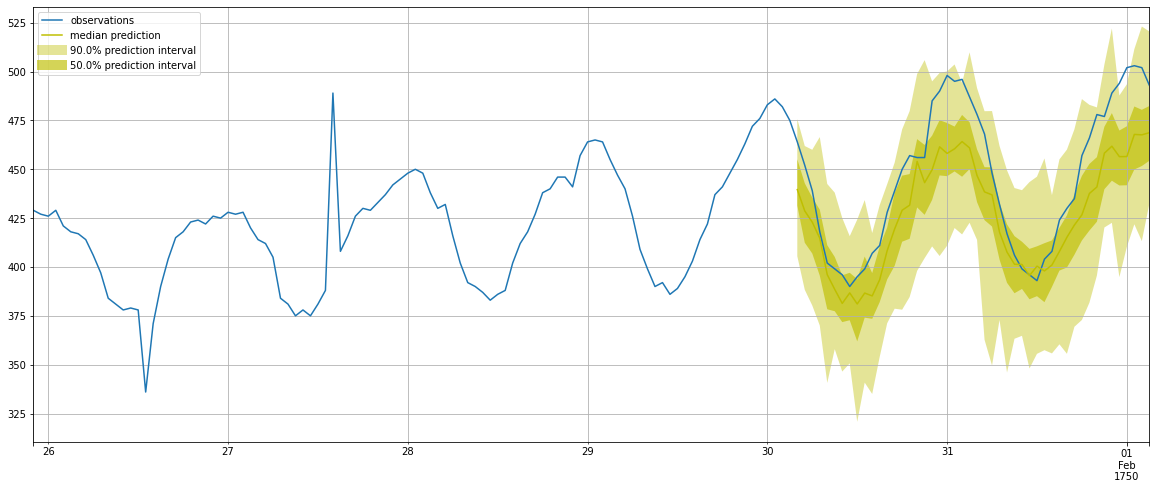

In [285]:
for i in range(10):
    plot_prob_forecasts(mlp_ts,mlp_forecast,i)

In [286]:
from gluonts.evaluation import Evaluator
mlp_forecast,mlp_ts = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=mlp_predictor,
    num_samples = 100
    #각 train data마다 몇개의 예측값을 봅을건지
)

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(mlp_ts), iter(mlp_forecast), num_series=len(dataset.test))
print(json.dumps(agg_metrics, indent=4))

Running evaluation:   0%|          | 0/414 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
Running evaluation: 100%|██████████| 414/414 [00:01<00:00, 255.43it/s]/usr/local/lib/python3.7/dist-packages/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/usr/local/lib/python3.7/dist-packages/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq



{
    "MSE": 4682497.014229586,
    "abs_error": 7978066.616016388,
    "abs_target_sum": 145558863.59960938,
    "abs_target_mean": 7324.822041043147,
    "seasonal_error": 336.9046924038302,
    "MASE": 2.6409297621845127,
    "MAPE": 0.19468731734295794,
    "sMAPE": 0.1603826534650895,
    "MSIS": 27.662886491774174,
    "QuantileLoss[0.1]": 3485110.86121397,
    "Coverage[0.1]": 0.07372181964573259,
    "QuantileLoss[0.5]": 7978066.656420708,
    "Coverage[0.5]": 0.44992954911433203,
    "QuantileLoss[0.9]": 3941763.817702674,
    "Coverage[0.9]": 0.8609098228663445,
    "RMSE": 2163.9078109359434,
    "NRMSE": 0.29542121280365957,
    "ND": 0.0548098990245057,
    "wQuantileLoss[0.1]": 0.02394296558126827,
    "wQuantileLoss[0.5]": 0.054809899302086316,
    "wQuantileLoss[0.9]": 0.027080204669262423,
    "mean_absolute_QuantileLoss": 5134980.445112451,
    "mean_wQuantileLoss": 0.03527768985087234,
    "MAE_Coverage": 0.03847960279119696,
    "OWA": NaN
}
